In [3]:
import numpy as np
import matplotlib.pyplot as plt
import timeit
import sys, os
sys.path.append(os.path.realpath('..'))
from scipy.interpolate import interp1d

from mgc.independence import *
from mgc.sims import linear

In [4]:
N = [
    50,
    100,
    200,
    500,
    1000,
    2000,
    5000,
    10000
]

tests = [
    Dcorr,
    MGC,
]

In [3]:
for test in tests:
    times = []
    for n in N:
        x, y = linear(n, 1, noise=True)
        time = %timeit -n 1 -r 3 -q -o test().test(x, y, workers=-1, auto=False)
        times.append(np.mean(time.timings))
    np.savetxt('../benchmarks/perf/{}.csv'.format(test.__name__), times, delimiter=',')
    
for test in tests:
    times = []
    for n in N:
        x, y = linear(n, 1, noise=True)
        time = %timeit -n 1 -r 3 -q -o test().test(x, y, workers=-1, auto=True)
        times.append(np.mean(time.timings))
    np.savetxt('../benchmarks/perf/Fast_{}.csv'.format(test.__name__), times, delimiter=',')

In [5]:
import seaborn as sns
sns.set(color_codes=True, style='white', context='talk', font_scale=2)
PALETTE = sns.color_palette("Set1")
sns.set_palette(PALETTE[3:])

In [10]:
FONTSIZE = 30

def plot_wall_times():
    fig = plt.figure(figsize=(20,10))
    
    custom_color = {
        "Dcorr" : "#377eb8",
        "MGC" : "#e41a1c",
    }
    
    test_name = [
        "Dcorr",
        "MGC",
        "Fast_Dcorr",
        "Fast_MGC",
        "Dcorr_energy",
        "Dcorr_kernlab",
    ]
    
    line_titles = [
        "Dcorr (mgc)",
        "MGC (mgc)",
        "Fast Dcorr (mgc)",
        "Fast MGC (mgc)",
        "Dcorr (energy)",
        "Dcorr (kernlab)",
    ]
    
    i = 0
    for name in test_name:
        test_times = np.genfromtxt('../benchmarks/perf/{}.csv'.format(name), delimiter=',')
        if name in custom_color.keys():
            plt.plot(N, test_times, custom_color[name], label=name, lw=5)
        else:
            plt.plot(N, test_times, label=name, lw=5)
        i += 1

    
    plt.annotate("Fast MGC (mgc)", xy=(N[-1] + 3688, 200), color="#e41a1c", fontsize=30)
    plt.annotate("Dcorr (energy)", xy=(N[-1] + 3688, 55), color="#984ea3", fontsize=30)
    plt.annotate("Dcorr (kernlab)", xy=(N[-1] + 3688, 25), color="#ff7f00", fontsize=30)
    plt.annotate("Fast Dcorr (mgc)", xy=(N[-1] + 3688, 10), color="#377eb8", fontsize=30)
    
    plt.xlabel('# of Samples (Data Points)')
    plt.ylabel('Execution Time (Seconds)')
    plt.xscale('log')
    plt.yscale('log')
    plt.xticks([1e1, 1e2, 1e3, 1e4])
    plt.yticks([1e-4, 1e-2, 1e0, 1e2])
    plt.savefig('../benchmarks/figs/indep_wall_times.pdf', transparent=True, bbox_inches='tight')

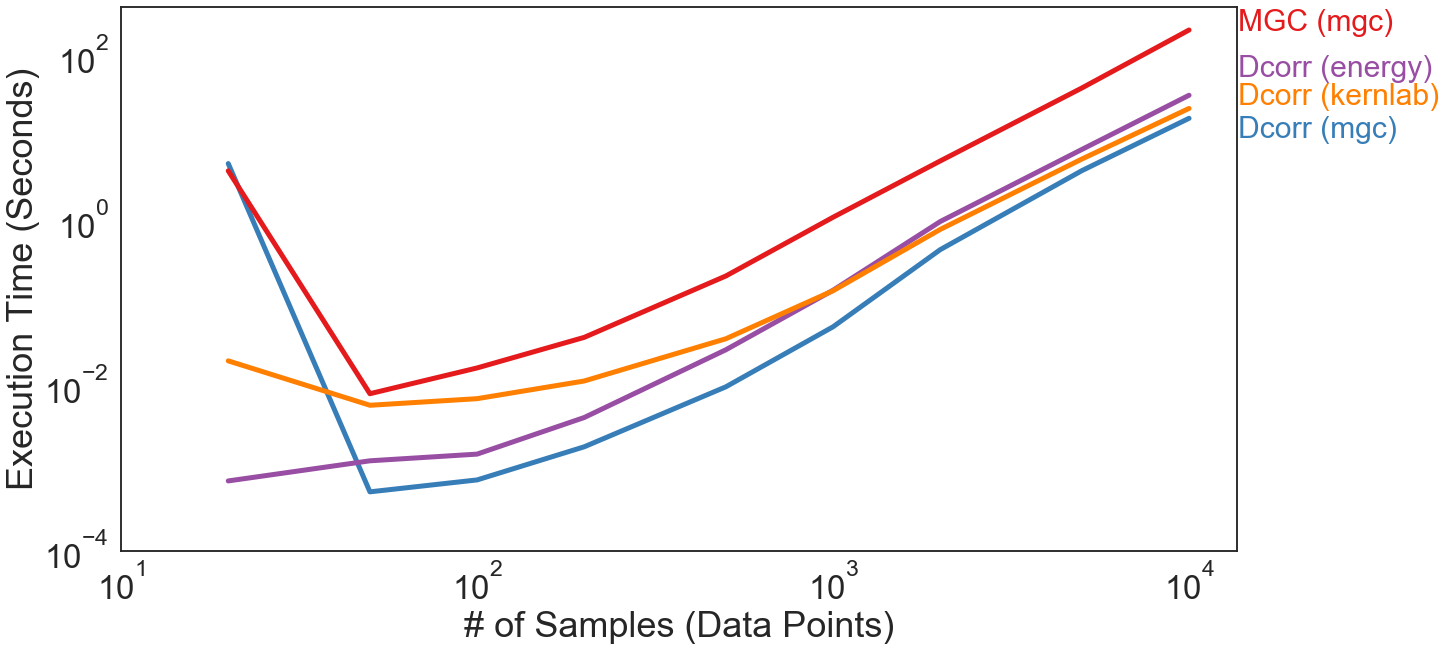

In [11]:
plot_wall_times()